# Big Data Analytics - Project - 2021

### Authors: Kirill Holtmann, Lilith Feer, Luca Guenin, Mark Martori Lopez, Remo ??
### Matrikel-Nr.: 16722423, 16720799, 16609521, 19759869, ???

## Goal

### Goal Description

# 

## Packages & Libraries

In [1]:
#install.packages("BiocManager")
#BiocManager::install("Rgraphviz")

#install.packages('CePa', .libPaths(), repos='http://cran.us.r-project.org')
# or
#BiocManager::install("cmapR")


#install.packages("data.table")
#install.packages("dplyr")
install.packages("Hmisc")
#BiocManager::install("outliers")

Installing package into ‘/home/nairboon/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Warning message in install.packages("Hmisc"):
“installation of package ‘Hmisc’ had non-zero exit status”


In [3]:
library(ggplot2)
#library(CePa)
library(data.table)
library(dplyr) 
library(tidyr)

library(outliers)
library(Hmisc)
library(cmapR)

ERROR: Error in library(outliers): there is no package called ‘outliers’


## Dataset
### Description:
#### Pancreatic cancer arises from the abnormal and uncontrolled growth of cells in the tissues of the pancreas. Pancreatic adenocarcinoma (PAAD) is the most common type of pancreatic cancer, accounting for approximately 85% of all types of pancreatic cancer. This cancer is the twelfth most common cancer and the seventh leading cause of cancer-related death. [01]

#### The dataset contains normalized RNA Sequencing reads for pancreatic cancer tumors. The measurement consists of ~20,000 genes for 185 pancreatic cancer tumors. The file format is GCT , a tab-delimited file used for sharing gene expression data and metadata (details for each sample) for samples.

### Link:
### https://www.kaggle.com/abhiparashar/cancer-prediction?select=PAAD.gct

### Load:

In [4]:
# 1 -  Read gct:
# original_dataset <- read.gct("Data/PAAD.gct")

# 2 - Read in data.table format:                    # Setting Participant ID as column Name -> skip = 3
original_dataset <- fread("Data/PAAD.gct", skip = 3, quote = "", header = TRUE, sep = "\t")

In [5]:
# Dimensions of the dataset
dim(original_dataset)

# Overview of types of Data
#str(original_dataset)

# Patients IDs
patients_IDs <- colnames(original_dataset)

# Features
rownames <- original_dataset[,1]

# Attributes
#attributes(original_dataset)

head(original_dataset,20)

[1] 18588   184

participant_id,aab1,aab4,aab6,aab8,aab9,aaba,aabe,aabf,aabh,⋯,aauh,aaui,aaul,a8t3,a8t5,a89d,a89d.1,a8sy,a8lh,aapl
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
sample_type,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,⋯,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Solid Tissue Normal,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor
mRNAseq_cluster,1,2,3,1,4,3,3,2,2,⋯,2,5,3,4,5,,2,3,1,5
bcr_patient_barcode,tcga-2j-aab1,tcga-2j-aab4,tcga-2j-aab6,tcga-2j-aab8,tcga-2j-aab9,tcga-2j-aaba,tcga-2j-aabe,tcga-2j-aabf,tcga-2j-aabh,⋯,tcga-xd-aauh,tcga-xd-aaui,tcga-xd-aaul,tcga-xn-a8t3,tcga-xn-a8t5,tcga-yb-a89d,tcga-yb-a89d,tcga-yh-a8sy,tcga-yy-a8lh,tcga-z5-aapl
bcr_patient_uuid,75119d1a-93e5-4ae7-9d60-69ee929a0772,33833131-1482-42d5-9cf5-01cade540234,70797499-16e6-48cc-8ae4-1e692713dad3,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,a5748656-5330-417a-8938-01f69ddb3576,e3a19e63-bae5-498b-9687-41194aa5728d,58c1c391-5ea3-4432-bb1e-e7e1974954bc,886d6116-d496-444f-9b7b-7449dad31055,c53328b4-0930-4e6a-a648-283b5565295e,⋯,b46b5a4c-59fc-4769-b05a-d15f9aaa753a,9a2db69e-d429-45d4-89ca-a2c4e0cfc116,597a5a56-244b-4218-a55d-5d08217ea28c,dd7bcdd8-1660-4dab-9860-9d136c4cee77,382b279f-87e1-4dbc-a2ca-c1dfde1cf254,b84b58c7-95b8-4162-8e61-414f8fe422c6,b84b58c7-95b8-4162-8e61-414f8fe422c6,503d7e36-df78-428d-9971-09ff707645c2,ede2e8a7-465e-4725-880d-519899aba0c0,6a4e10b6-e6c4-4210-ae4d-0d8e8d0cb3ec
vital_status,dead,alive,dead,alive,dead,dead,alive,dead,alive,⋯,alive,dead,alive,alive,alive,alive,alive,alive,alive,alive
days_to_death,66,NA,293,NA,627,607,NA,691,NA,⋯,NA,366,NA,NA,NA,NA,NA,NA,NA,NA
days_to_last_followup,NA,729,NA,80,NA,NA,676,NA,1287,⋯,395,NA,498,951,720,350,350,388,2016,467
additional_studies,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
adenocarcinoma_invasion,yes,yes,yes,yes,yes,yes,yes,yes,yes,⋯,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes


### Separate the two data sets (meta data and expression data)

In [6]:
Expression_data <- original_dataset[124:length(original_dataset$participant_id),]
Patient_data <- original_dataset[1:123,]
Patient_data
Expression_data

participant_id,aab1,aab4,aab6,aab8,aab9,aaba,aabe,aabf,aabh,⋯,aauh,aaui,aaul,a8t3,a8t5,a89d,a89d.1,a8sy,a8lh,aapl
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
sample_type,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,⋯,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Solid Tissue Normal,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor,Primary solid Tumor
mRNAseq_cluster,1,2,3,1,4,3,3,2,2,⋯,2,5,3,4,5,,2,3,1,5
bcr_patient_barcode,tcga-2j-aab1,tcga-2j-aab4,tcga-2j-aab6,tcga-2j-aab8,tcga-2j-aab9,tcga-2j-aaba,tcga-2j-aabe,tcga-2j-aabf,tcga-2j-aabh,⋯,tcga-xd-aauh,tcga-xd-aaui,tcga-xd-aaul,tcga-xn-a8t3,tcga-xn-a8t5,tcga-yb-a89d,tcga-yb-a89d,tcga-yh-a8sy,tcga-yy-a8lh,tcga-z5-aapl
bcr_patient_uuid,75119d1a-93e5-4ae7-9d60-69ee929a0772,33833131-1482-42d5-9cf5-01cade540234,70797499-16e6-48cc-8ae4-1e692713dad3,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,a5748656-5330-417a-8938-01f69ddb3576,e3a19e63-bae5-498b-9687-41194aa5728d,58c1c391-5ea3-4432-bb1e-e7e1974954bc,886d6116-d496-444f-9b7b-7449dad31055,c53328b4-0930-4e6a-a648-283b5565295e,⋯,b46b5a4c-59fc-4769-b05a-d15f9aaa753a,9a2db69e-d429-45d4-89ca-a2c4e0cfc116,597a5a56-244b-4218-a55d-5d08217ea28c,dd7bcdd8-1660-4dab-9860-9d136c4cee77,382b279f-87e1-4dbc-a2ca-c1dfde1cf254,b84b58c7-95b8-4162-8e61-414f8fe422c6,b84b58c7-95b8-4162-8e61-414f8fe422c6,503d7e36-df78-428d-9971-09ff707645c2,ede2e8a7-465e-4725-880d-519899aba0c0,6a4e10b6-e6c4-4210-ae4d-0d8e8d0cb3ec
vital_status,dead,alive,dead,alive,dead,dead,alive,dead,alive,⋯,alive,dead,alive,alive,alive,alive,alive,alive,alive,alive
days_to_death,66,NA,293,NA,627,607,NA,691,NA,⋯,NA,366,NA,NA,NA,NA,NA,NA,NA,NA
days_to_last_followup,NA,729,NA,80,NA,NA,676,NA,1287,⋯,395,NA,498,951,720,350,350,388,2016,467
additional_studies,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
adenocarcinoma_invasion,yes,yes,yes,yes,yes,yes,yes,yes,yes,⋯,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes


participant_id,aab1,aab4,aab6,aab8,aab9,aaba,aabe,aabf,aabh,⋯,aauh,aaui,aaul,a8t3,a8t5,a89d,a89d.1,a8sy,a8lh,aapl
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SLC35E2,7.4500,8.1000,7.2000,8.0000,7.6500,8.1000,8.2000,8.2000,7.5500,⋯,8.4500,7.9500,8.3000,8.0500,8.2000,7.2500,7.4000,7.3500,7.2000,9.0500
A1BG,6.4000,5.8000,6.4000,5.8000,6.7000,6.6000,6.3000,6.5000,5.7000,⋯,7.1000,7.1000,6.7000,7.0000,6.9000,7.1000,7.3000,7.9000,6.0000,6.9000
A1CF,4.7000,5.7000,3.0000,5.1000,4.4000,4.2000,1.6000,6.8000,6.0000,⋯,5.4000,6.4000,6.5000,4.4000,3.3000,3.6000,6.2000,1.2000,4.9000,2.0000
A2BP1,-1.0000,1.1000,NaN,NaN,0.10000,NaN,NaN,1.7000,0.40000,⋯,3.5000,1.3000,-0.30000,NaN,2.1000,2.0000,0.0000,NaN,2.0000,NaN
A2LD1,7.5000,6.8000,7.3000,7.5000,7.4000,6.6000,7.1000,6.8000,8.0000,⋯,6.5000,7.3000,6.1000,6.7000,6.5000,6.7000,6.7000,6.5000,6.9000,6.7000
A2ML1,6.4000,NaN,10.800,4.1000,9.3000,9.8000,6.2000,3.8000,2.3000,⋯,0.10000,3.4000,3.7000,-0.90000,3.6000,1.0000,2.8000,10.500,3.1000,5.1000
A2M,14.300,14.000,13.100,13.800,14.600,13.300,13.400,14.200,13.900,⋯,14.500,14.300,14.500,14.200,14.300,14.900,14.500,13.000,12.100,13.300
A4GALT,10.600,10.200,10.100,8.6000,10.100,9.3000,9.5000,8.4000,8.4000,⋯,9.1000,9.5000,10.000,9.5000,9.1000,10.500,9.8000,10.800,8.3000,9.0000
A4GNT,8.8000,5.6000,0.20000,3.2000,5.7000,2.6000,5.1000,6.9000,4.3000,⋯,4.1000,5.2000,4.4000,5.6000,5.8000,2.7000,4.3000,0.80000,6.6000,2.2000


### Transpose the data sets

In [7]:
transposefunction <- function(dataset){
    rowname <- dataset$participant_id
    colname <- 1:length(original_dataset[1,])
    transposed_dataset <- transpose(dataset)
    rownames(transposed_dataset) <- colname
    colnames(transposed_dataset) <- rowname
    transposed_dataset <- transposed_dataset[2:nrow(transposed_dataset),]
    return(transposed_dataset)
}

t_expression_data <- transposefunction(Expression_data)
t_patient_data <- transposefunction(Patient_data)

dim(t_expression_data)
dim(t_patient_data)

[1]   183 18465

[1] 183 123

In [8]:
# convert the whole data set into floats
t_expression_data[] <- lapply(t_expression_data, function(x) {as.numeric(as.character(x))})

dimensions <- dim(t_expression_data)
dimensions[1]*dimensions[2]

table(is.na(t_expression_data))

summary(is.na(t_expression_data))
## there are 134'954 missing values (from 3'379'095 total) in the expression data set

[1] 3379095


  FALSE    TRUE 
3244141  134954 

  SLC35E2           A1BG            A1CF           A2BP1        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:183       FALSE:183       FALSE:181       FALSE:141      
                                 TRUE :2         TRUE :42       
   A2LD1           A2ML1            A2M            A4GALT       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:183       FALSE:156       FALSE:183       FALSE:183      
                 TRUE :27                                       
   A4GNT            AAA1            AAAS           AACSL        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:174       FALSE:125       FALSE:183       FALSE:107      
 TRUE :9         TRUE :58                        TRUE :76       
    AACS           AADAC           AADAT           AAGAB        
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:183       FALSE:179       FALSE:183       FALSE:183      
                 TRUE :4 

In [9]:
table(is.na(t_patient_data))

dimensions <- dim(t_patient_data)
dimensions[1]*dimensions[2]

summary(is.na(t_patient_data))
## 9654 of 22632 are missing values --> but some have a meaning (e.g. when patients haven't died days_to_death is NA)


FALSE  TRUE 
12855  9654 

[1] 22509

 sample_type     mRNAseq_cluster bcr_patient_barcode bcr_patient_uuid
 Mode :logical   Mode :logical   Mode :logical       Mode :logical   
 FALSE:183       FALSE:183       FALSE:183           FALSE:183       
                                                                     
 vital_status    days_to_death   days_to_last_followup additional_studies
 Mode :logical   Mode :logical   Mode :logical         Mode:logical      
 FALSE:183       FALSE:95        FALSE:88              TRUE:183          
                 TRUE :88        TRUE :95                                
 adenocarcinoma_invasion age_at_initial_pathologic_diagnosis
 Mode :logical           Mode :logical                      
 FALSE:183               FALSE:183                          
                                                            
 alcohol_history_documented alcoholic_exposure_category
 Mode :logical              Mode :logical              
 FALSE:171                  FALSE:102                  
 TRUE :12   

In [ ]:
head(t_patient_data,20)

In [ ]:
# turn the whole dataset into floats
head(t_expression_data,20)

### Histograms and check for outliers using grubbs test

In [ ]:
outlier_fun <- function(df){
  for (columnindex in 1:ncol(df)){
      hist(data.matrix(df[,..columnindex]))
      print(grubbs.test(data.matrix(df[,..columnindex])))
  }
}

outlier_fun(t_expression_data)
# if the p-value is less than the chosen significance threshold (generally α = 0.05) then the 
# null hypothesis is rejected and we will conclude that the lowest/highest value is an outlier.

## Patient meta data histograms 

### Numeric columns

In [12]:
t_patient_data <- t_patient_data %>%
    mutate_all(type.convert) %>%
    mutate_if(is.factor, as.character)

# only numeric values
df_patient_num <-  t_patient_data %>% select_if(is.numeric)

sprintf("%d numeric columns",ncol(df_patient_num))

[1] "28 numeric columns"

In [ ]:
ggplot(gather(df_patient_num[,1:9], cols, value), aes(x = value)) + 
       geom_histogram(binwidth = 1) + facet_wrap(.~cols, scales = "free") 

In [ ]:
ggplot(gather(df_patient_num[,10:18], cols, value), aes(x = value)) + 
       geom_histogram(binwidth = 1) + facet_wrap(.~cols, scales = "free") 

In [ ]:
ggplot(gather(df_patient_num[,19:28], cols, value), aes(x = value)) + 
       geom_histogram(binwidth = 1) + facet_wrap(.~cols, scales = "free") 

## Correlations - Pearson - Patients Data

In [13]:
# All Character Fields as Factors? 

t_patient_data <- t_patient_data %>%
    mutate_all(type.convert) %>%
    mutate_if(is.character, as.factor)

In [14]:
# WAY 1:

# Patients Features Correlation
corrPatient <- round(cor(df_patient_num, use='pairwise', method = 'pearson'),2)


# Avoid columns with All raws == NA ??????
corrPatientnoNA <- corrPatient[,colSums(is.na(corrPatient))<nrow(corrPatient)]


# Setting all NA to 0 only for correlation
corrPatient[is.na(corrPatient)] <- 0


Warning message in cor(df_patient_num, use = "pairwise", method = "pearson"):
“the standard deviation is zero”


In [15]:
head(corrPatient,10) # 0 Values are NA values, 0.00 Values are 0.00.

,mRNAseq_cluster,days_to_death,days_to_last_followup,age_at_initial_pathologic_diagnosis,amount_of_alcohol_consumption_per_day,day_of_dcc_upload,day_of_form_completion,days_to_birth,days_to_diabetes_onset,days_to_index,⋯,number_of_lymphnodes_positive_by_he,number_of_lymphnodes_positive_by_ihc,number_pack_years_smoked,stopped_smoking_year,system_version,tobacco_smoking_history,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
mRNAseq_cluster,1.00,0.20,-0.25,-0.05,-0.22,0,-0.05,0.05,0.54,0,⋯,0.13,0,-0.06,0.10,-0.07,0.07,0,-0.11,0.05,0.13
days_to_death,0.20,1.00,0.00,-0.06,-0.33,0,-0.13,0.06,-0.73,0,⋯,-0.15,0,-0.04,0.17,-0.32,0.17,0,0.05,-0.57,0.06
days_to_last_followup,-0.25,0.00,1.00,-0.27,0.02,0,0.26,0.27,-0.10,0,⋯,-0.04,0,0.25,0.14,-0.65,0.05,0,0.16,-0.72,0.00
age_at_initial_pathologic_diagnosis,-0.05,-0.06,-0.27,1.00,-0.02,0,0.05,-1.00,-0.14,0,⋯,-0.03,0,-0.07,-0.51,0.16,-0.03,0,0.01,0.10,-0.71
amount_of_alcohol_consumption_per_day,-0.22,-0.33,0.02,-0.02,1.00,0,0.19,0.03,0.30,0,⋯,0.26,0,0.28,-0.05,0.09,-0.09,0,0.08,-0.09,-0.34
day_of_dcc_upload,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0,⋯,0.00,0,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00
day_of_form_completion,-0.05,-0.13,0.26,0.05,0.19,0,1.00,-0.05,0.04,0,⋯,-0.03,0,-0.07,0.05,0.12,0.02,0,0.32,0.19,0.03
days_to_birth,0.05,0.06,0.27,-1.00,0.03,0,-0.05,1.00,0.14,0,⋯,0.03,0,0.08,0.52,-0.16,0.03,0,-0.01,-0.10,0.72
days_to_diabetes_onset,0.54,-0.73,-0.10,-0.14,0.30,0,0.04,0.14,1.00,0,⋯,0.04,0,-0.11,0.18,-0.16,-0.22,0,-0.17,0.67,0.35
days_to_index,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0,⋯,0.00,0,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00


In [47]:
dfp <- na.omit(df_patient_num)
dfp

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


mRNAseq_cluster,days_to_death,days_to_last_followup,age_at_initial_pathologic_diagnosis,amount_of_alcohol_consumption_per_day,day_of_dcc_upload,day_of_form_completion,days_to_birth,days_to_diabetes_onset,days_to_index,⋯,number_of_lymphnodes_positive_by_he,number_of_lymphnodes_positive_by_ihc,number_pack_years_smoked,stopped_smoking_year,system_version,tobacco_smoking_history,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>


In [69]:
# WAY 2: Hmisc
#install.packages("Hmisc")
library(Hmisc)



corrPatient2 <- rcorr(as.matrix(df_patient_num))
#corrPatient2 <- round(rcorr(as.matrix(df_patient_num)),2) # It already is numeric -rcorr uses 'pairwise' by default

corrPatient_plot <- cor(as.matrix(df_patient_num), use="pairwise.complete.obs")

corrPatient_plot[is.na(corrPatient_plot)] <- 0

corrPatient_plot

Warning message in sqrt(npair - 2):
“NaNs produced”
Warning message in cor(as.matrix(df_patient_num), use = "pairwise.complete.obs"):
“the standard deviation is zero”


,mRNAseq_cluster,days_to_death,days_to_last_followup,age_at_initial_pathologic_diagnosis,amount_of_alcohol_consumption_per_day,day_of_dcc_upload,day_of_form_completion,days_to_birth,days_to_diabetes_onset,days_to_index,⋯,number_of_lymphnodes_positive_by_he,number_of_lymphnodes_positive_by_ihc,number_pack_years_smoked,stopped_smoking_year,system_version,tobacco_smoking_history,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
mRNAseq_cluster,1.00000000,0.19566185,-0.248585882,-0.05302266,-0.22478938,0,-0.04774432,0.05181841,0.53686039,0,⋯,0.13340154,0,-0.056101277,0.09769757,-0.06994589,0.06950063,0,-0.112979921,0.047933585,0.127098028
days_to_death,0.19566185,1.00000000,0.000000000,-0.05798936,-0.33082062,0,-0.12529848,0.05706725,-0.73250001,0,⋯,-0.14506504,0,-0.036038326,0.16798827,-0.31716982,0.17013852,0,0.051431761,-0.570392854,0.058129242
days_to_last_followup,-0.24858588,0.00000000,1.000000000,-0.27138071,0.01645460,0,0.26085024,0.26978703,-0.10227480,0,⋯,-0.03707017,0,0.247807205,0.14299741,-0.65341490,0.05108127,0,0.155000264,-0.717437940,-0.004843835
age_at_initial_pathologic_diagnosis,-0.05302266,-0.05798936,-0.271380714,1.00000000,-0.02386114,0,0.04946877,-0.99965938,-0.13546838,0,⋯,-0.03106103,0,-0.072866945,-0.51431132,0.16219081,-0.03124219,0,0.012080754,0.104432944,-0.712470516
amount_of_alcohol_consumption_per_day,-0.22478938,-0.33082062,0.016454605,-0.02386114,1.00000000,0,0.18573914,0.02553868,0.29700817,0,⋯,0.26232743,0,0.275971720,-0.04660656,0.08624070,-0.08658153,0,0.084962779,-0.086224187,-0.335967310
day_of_dcc_upload,0.00000000,0.00000000,0.000000000,0.00000000,0.00000000,0,0.00000000,0.00000000,0.00000000,0,⋯,0.00000000,0,0.000000000,0.00000000,0.00000000,0.00000000,0,0.000000000,0.000000000,0.000000000
day_of_form_completion,-0.04774432,-0.12529848,0.260850245,0.04946877,0.18573914,0,1.00000000,-0.04509646,0.04013113,0,⋯,-0.02644927,0,-0.072749891,0.04517759,0.12103278,0.01744099,0,0.320914658,0.194974172,0.032602015
days_to_birth,0.05181841,0.05706725,0.269787035,-0.99965938,0.02553868,0,-0.04509646,1.00000000,0.13597587,0,⋯,0.03302229,0,0.080132587,0.52030896,-0.16174268,0.03038316,0,-0.010712011,-0.102993016,0.715479104
days_to_diabetes_onset,0.53686039,-0.73250001,-0.102274795,-0.13546838,0.29700817,0,0.04013113,0.13597587,1.00000000,0,⋯,0.03553213,0,-0.106643211,0.18340413,-0.16474138,-0.21571367,0,-0.165853230,0.674256182,0.350163995
days_to_index,0.00000000,0.00000000,0.000000000,0.00000000,0.00000000,0,0.00000000,0.00000000,0.00000000,0,⋯,0.00000000,0,0.000000000,0.00000000,0.00000000,0.00000000,0,0.000000000,0.000000000,0.000000000


In [39]:
?cor

In [64]:
# WAY 2

# This function returns a Table with Rownames, Colnames, Correlation Coefficient, p-value
flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
    )
}

### Table of correlations

In [70]:
# WAY 2

# Visualize Correlation - Table

dffc <- flattenCorrMatrix(corrPatient2$r, corrPatient2$P)
dffc

row,column,cor,p
<fct>,<fct>,<dbl>,<dbl>
mRNAseq_cluster,days_to_death,0.19566185,0.06016458
mRNAseq_cluster,days_to_last_followup,-0.24858588,0.02178754
days_to_death,days_to_last_followup,NA,NA
mRNAseq_cluster,age_at_initial_pathologic_diagnosis,-0.05302266,0.48210479
days_to_death,age_at_initial_pathologic_diagnosis,-0.05798936,0.57670918
days_to_last_followup,age_at_initial_pathologic_diagnosis,-0.27138071,0.01054076
mRNAseq_cluster,amount_of_alcohol_consumption_per_day,-0.22478938,0.22407038
days_to_death,amount_of_alcohol_consumption_per_day,-0.33082062,0.17994780
days_to_last_followup,amount_of_alcohol_consumption_per_day,0.01645460,0.95547697


### Plot

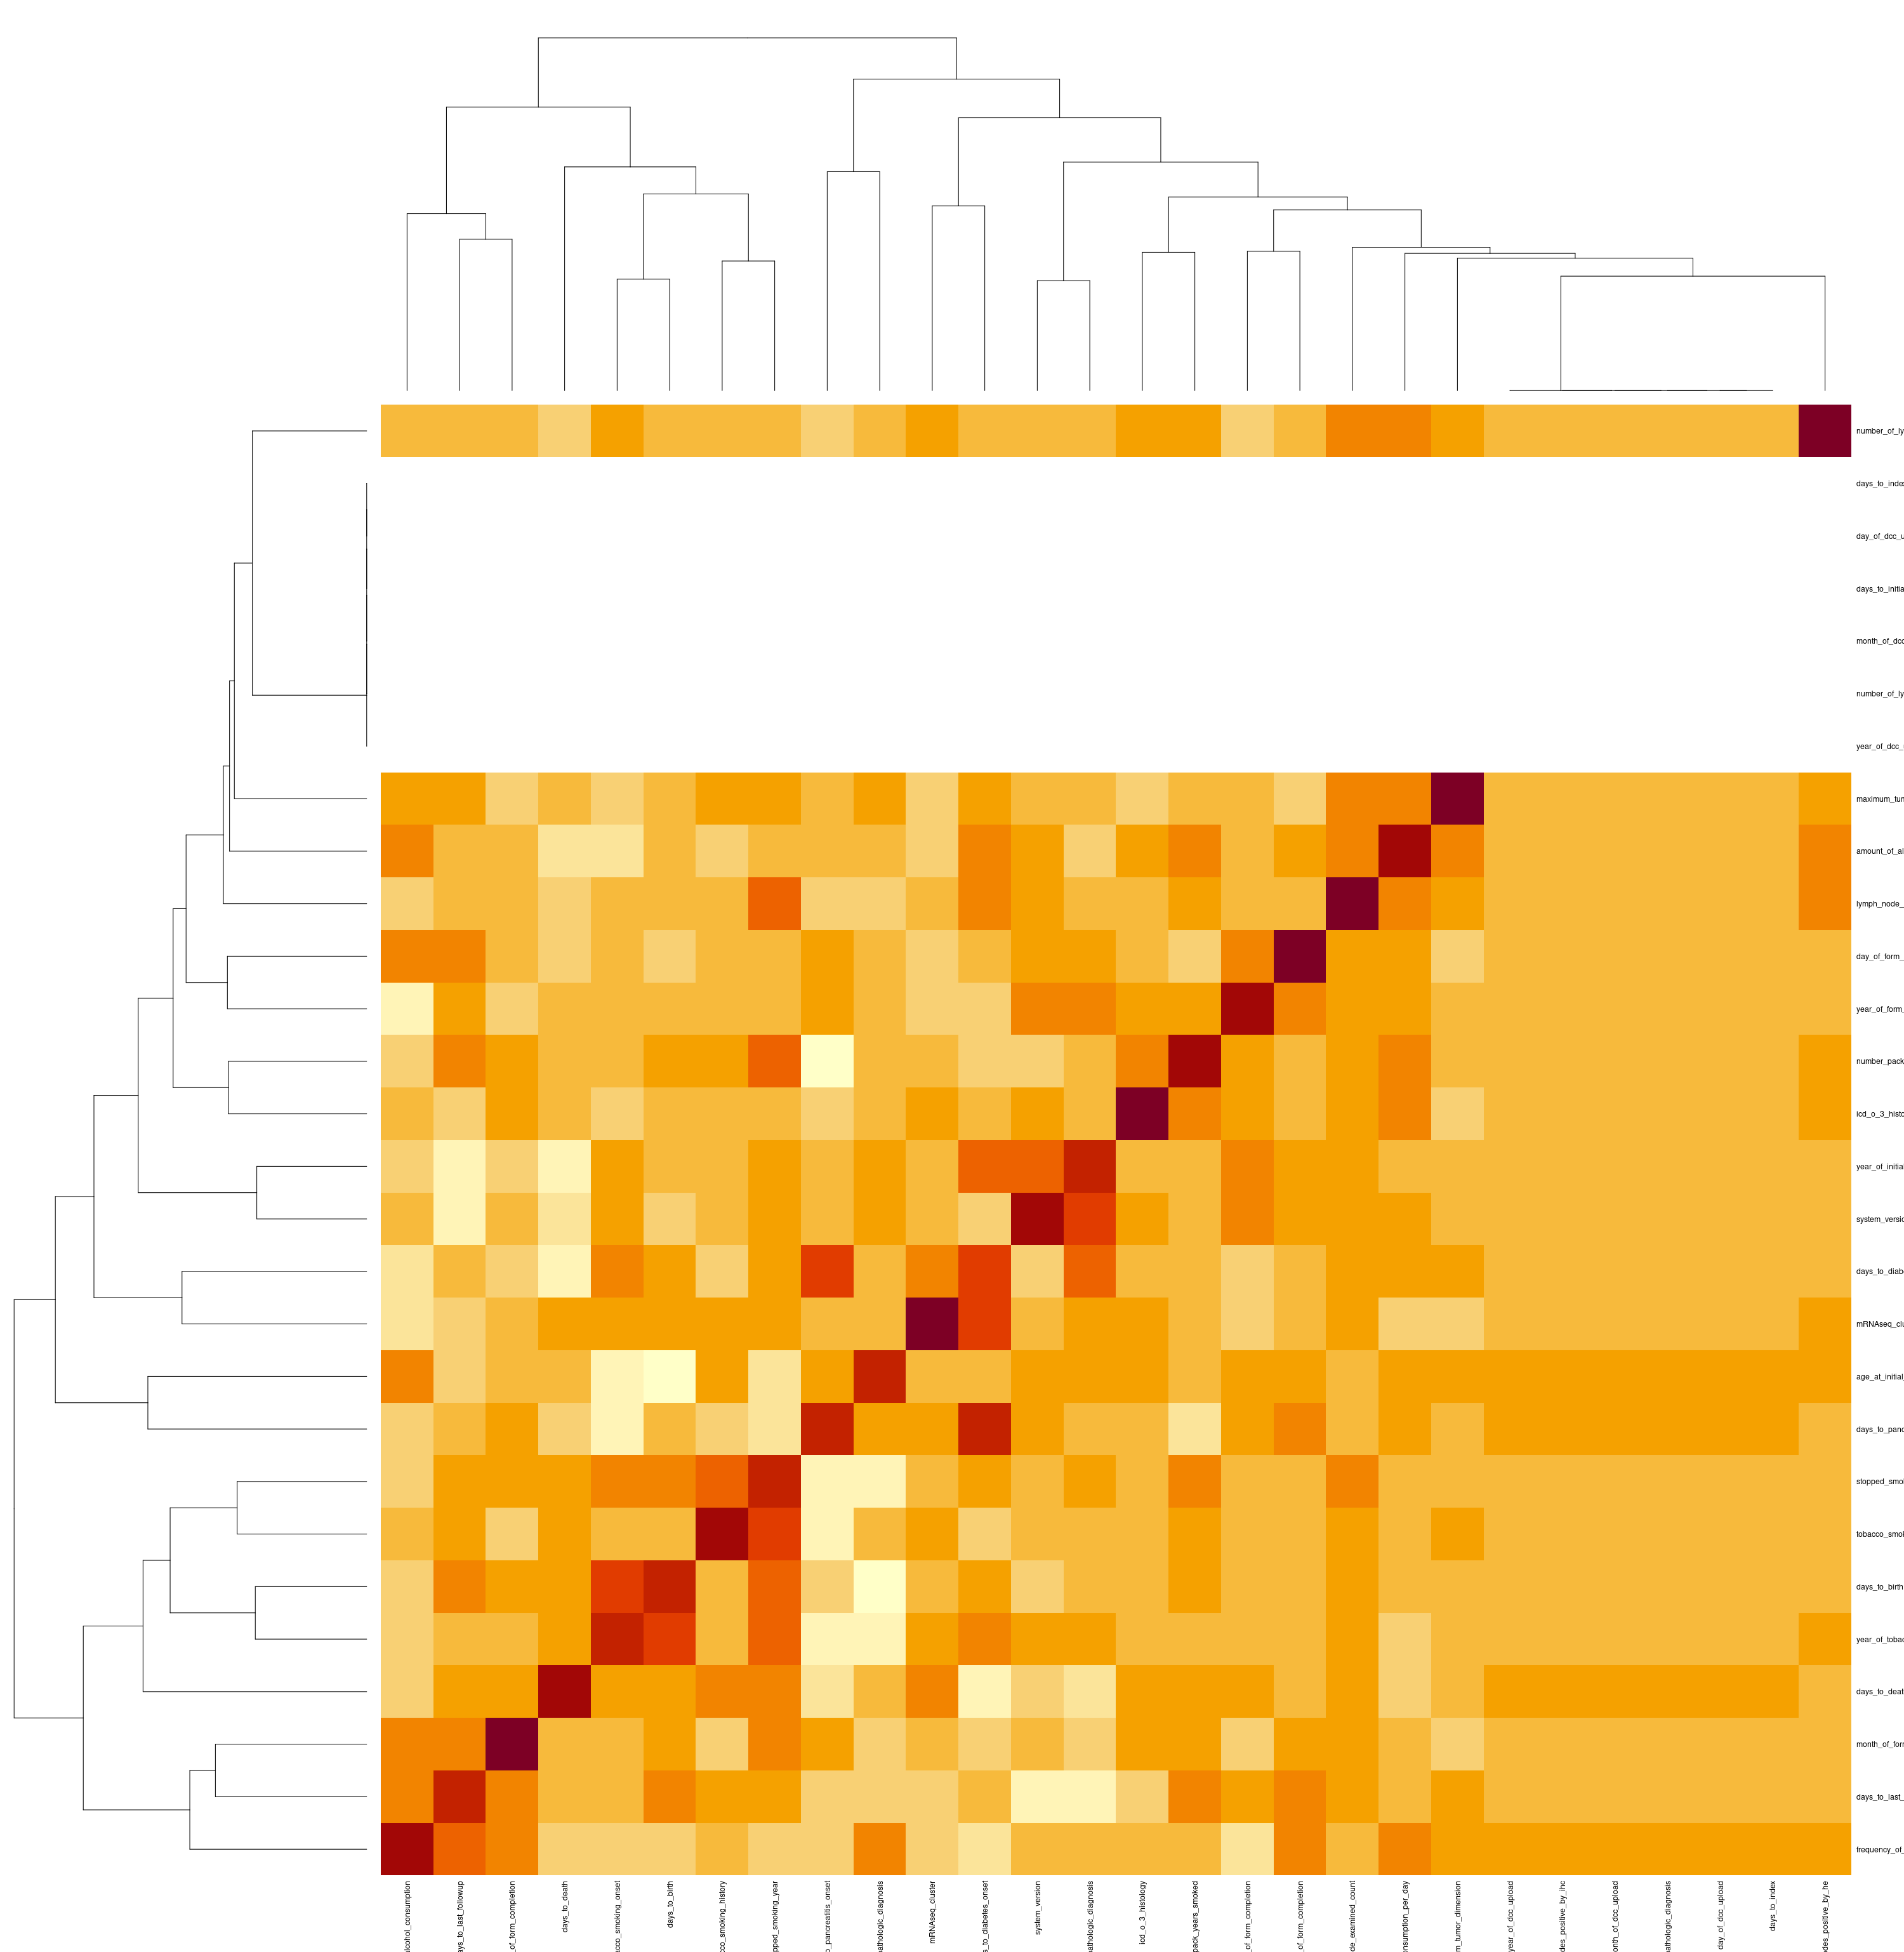

In [66]:
# WAY 1:

heatmap(corrPatient)


Warning message in corrplot(corrPatient_plot, type = "upper", order = "hclust", :
“Not been able to calculate text margin, please try again with a clean new empty window using {plot.new(); dev.off()} or reduce tl.cex”


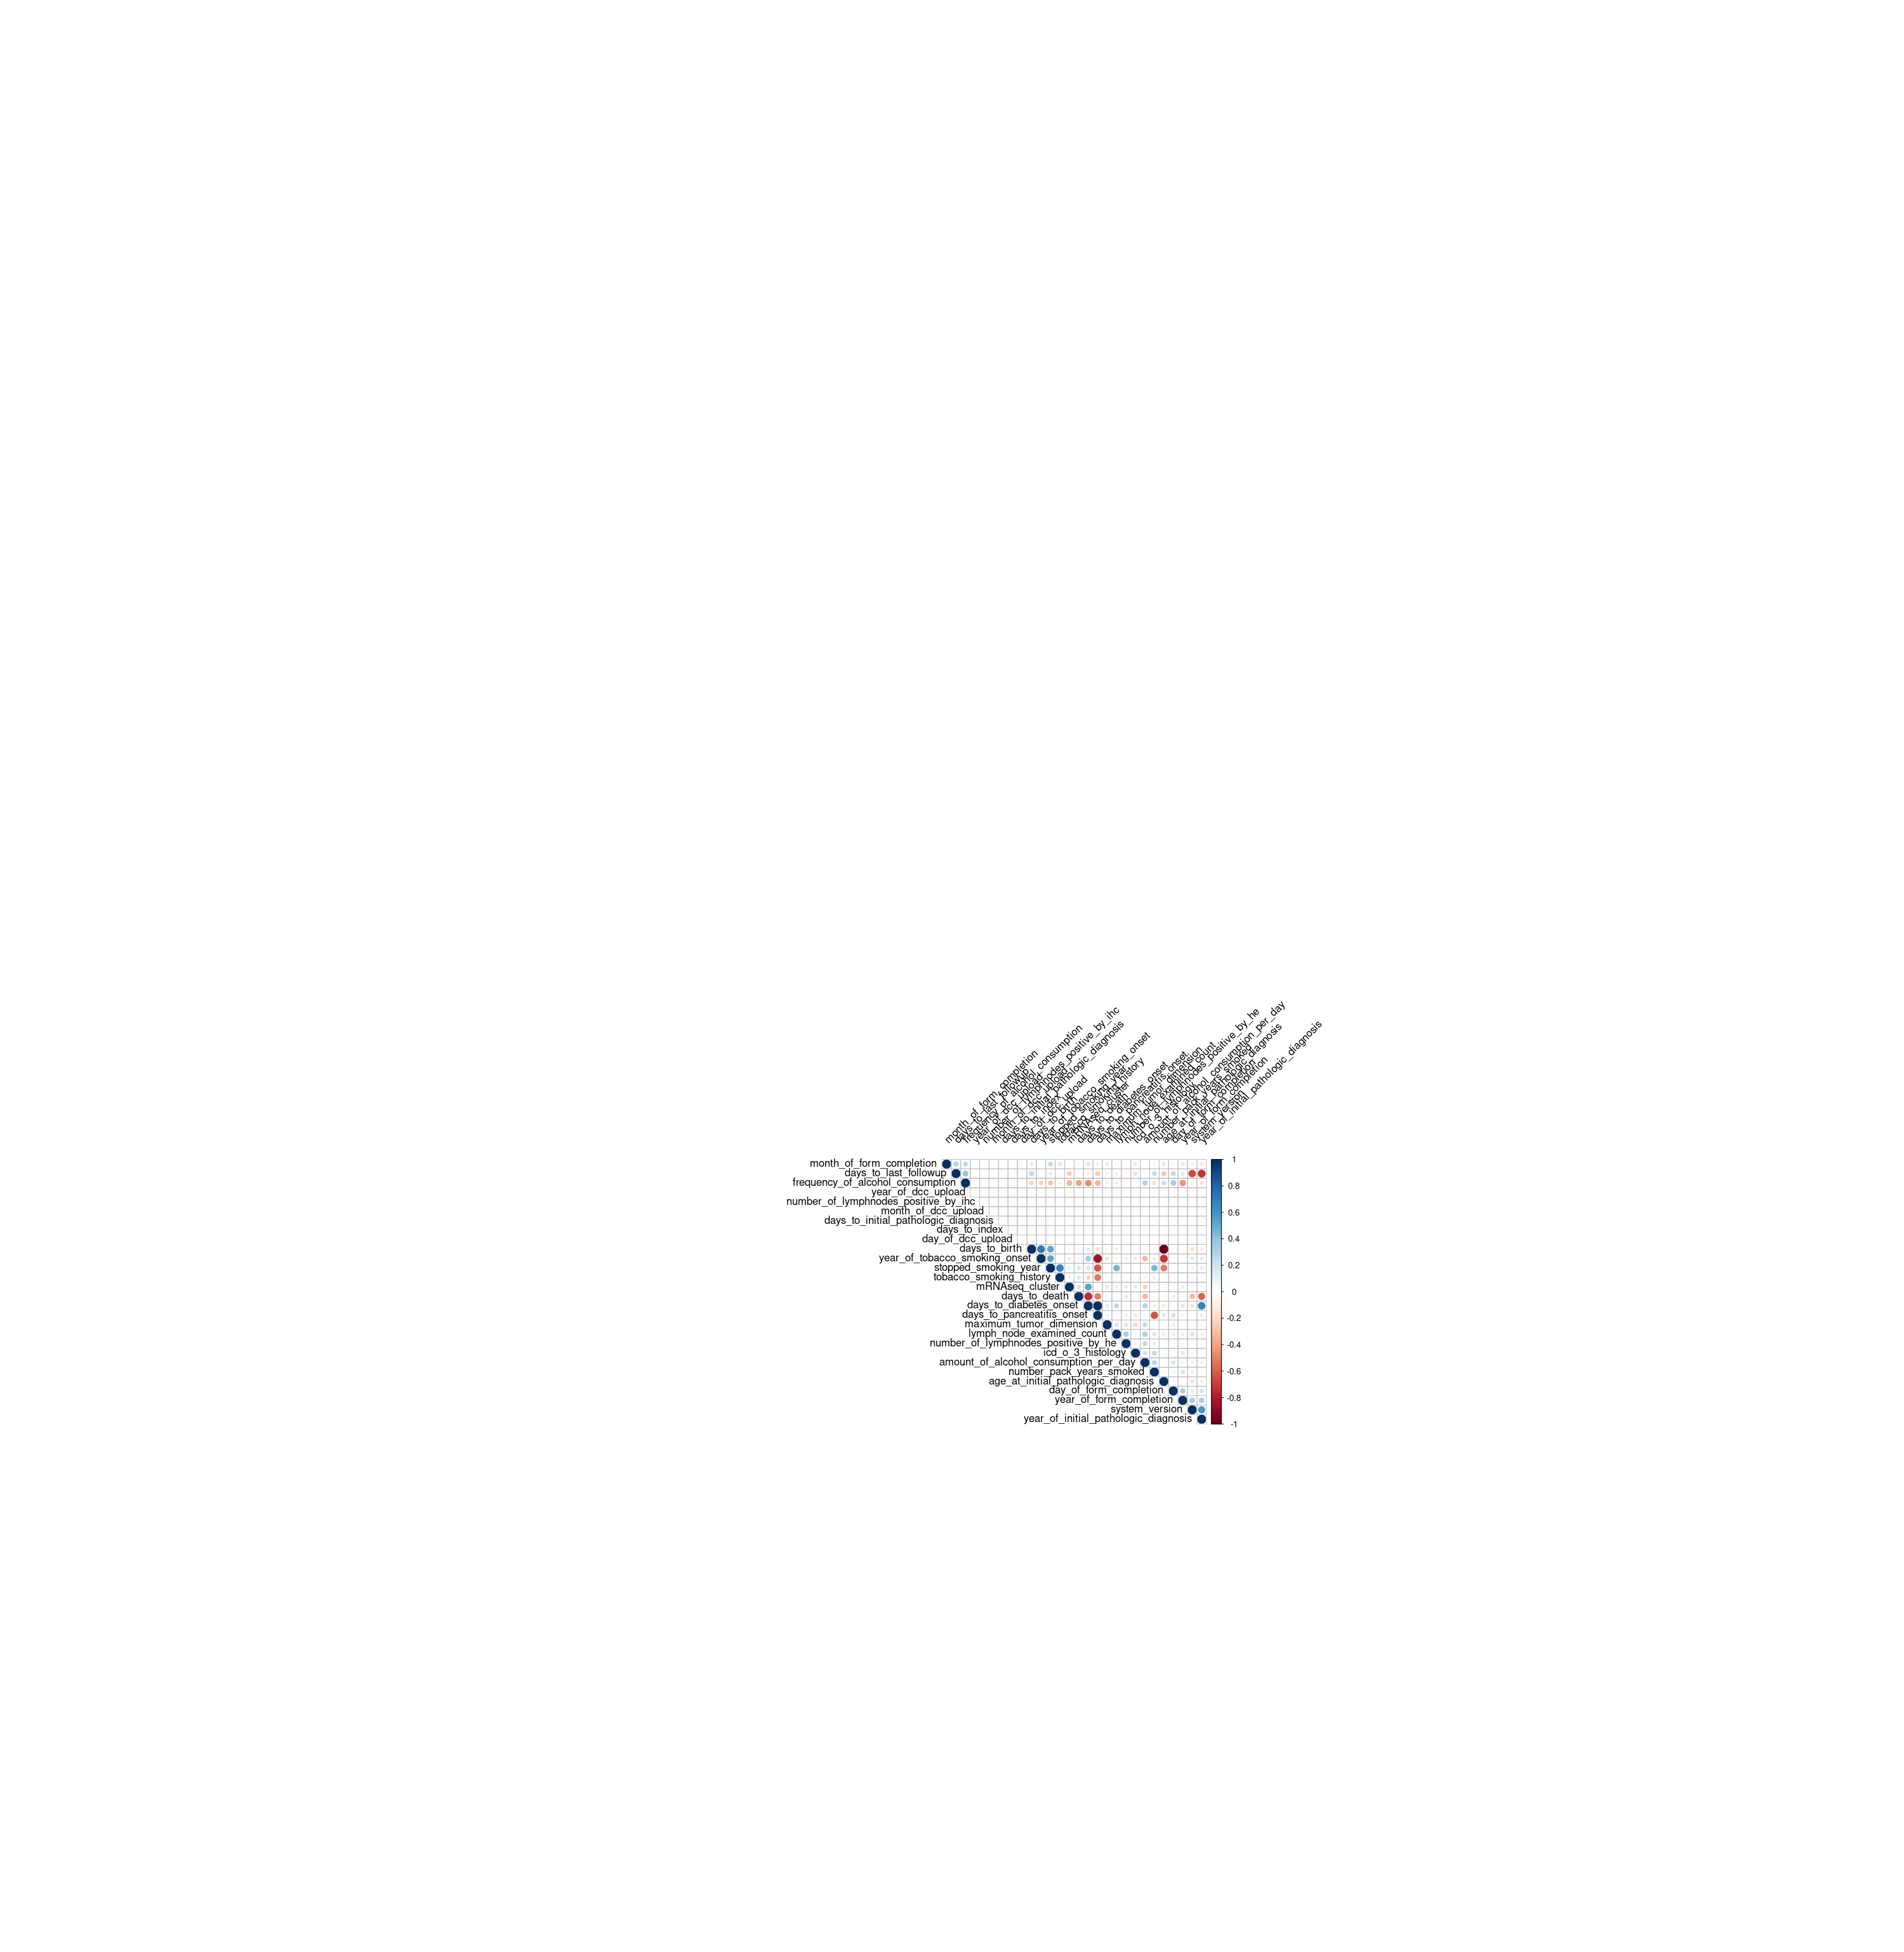

In [71]:
# PLOT WAY 2:
#install.packages("corrplot")
library(corrplot)

#options(repr.plot.width = 30, repr.plot.height = 30.75, repr.plot.res = 100)

corrplot(corrPatient_plot, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

In [34]:
?corrplot

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 


Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last


The following objects are masked from ‘package:data.table’:

    first, last



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend




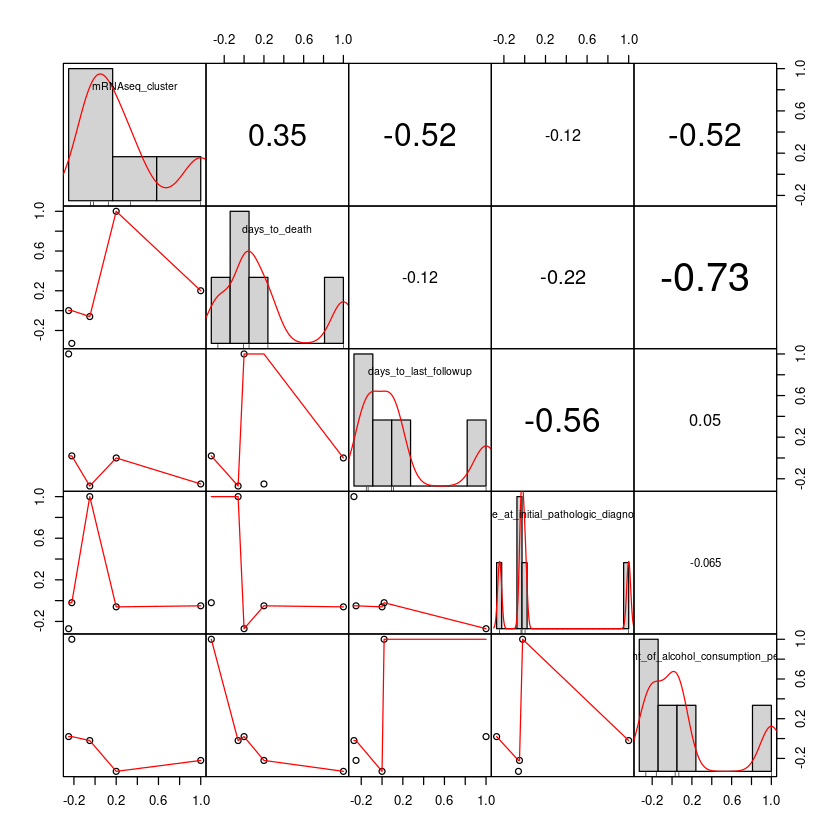

In [22]:
# PLOT WAY 3:

#install.packages("PerformanceAnalytics")
library(PerformanceAnalytics)
chart.Correlation(corrPatient[1:5,1:5], histogram=TRUE, pch=19)


## References

#### 01 - Baek, B., Lee, H. Prediction of survival and recurrence in patients with pancreatic cancer by integrating multi-omics data. Sci Rep 10, 18951 (2020). https://doi.org/10.1038/s41598-020-76025-1